# Assignment 07: Due 10/10

In this assignment we will look at some real data from the CMS experiment at the LHC. The LHC makes a lot of its data publically available here: http://opendata.cern.ch. The information about the data set we will be working with at can be found here: http://opendata.cern.ch/record/545

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

## Imports 

For this assignemnt you will need the following imports

In [2]:
ep = 'https://raw.githubusercontent.com/Tuo96960/3511-Fall-2022/main/Module7/Assignment/data/Ep_data.txt'
wm = 'https://raw.githubusercontent.com/Tuo96960/3511-Fall-2022/main/Module7/Assignment/data/Wmass_data.txt'
zrun = 'https://raw.githubusercontent.com/Tuo96960/3511-Fall-2022/main/Module7/Assignment/data/Zee_Run2011A.csv'
decay = 'https://raw.githubusercontent.com/Tuo96960/3511-Fall-2022/main/Module7/Assignment/data/decay_data.txt'
pr = 'https://raw.githubusercontent.com/Tuo96960/3511-Fall-2022/main/Module7/Assignment/data/proton_radius_data.txt'

# Problem 1)

Create a Pandas DataFrame object from the data file *Z_ee_Run2011A.csv*, located in the *data* dircetroy, and use the *info* function to list the information from the DataFrame.

In [3]:
zr = pd.read_csv(zrun)
zr.info
#zr

<bound method DataFrame.info of           Run       Event      pt1      eta1      phi1  Q1 type1  \
0      163286   109060857  37.5667  2.289180  2.052600  -1    EE   
1      163286   109275715  36.2901 -0.837253 -1.585920   1    EB   
2      163286   109075352  25.9705 -0.697420  1.635990  -1    EB   
3      163286   109169766  41.0075  1.461920 -0.532464   1    EB   
4      163286   108947653  39.8985 -0.592666 -2.394720   1    EB   
...       ...         ...      ...       ...       ...  ..   ...   
18880  165993  1245864355  67.9728  0.591181  2.824340  -1    EB   
18881  165993  1245110568  42.8005 -2.291330  0.779165   1    EE   
18882  165993  1245123133  25.4359  0.137592  2.641270   1    EB   
18883  165993  1245207259  51.1762  0.778649  2.683120  -1    EB   
18884  165993  1245337805  28.6185  0.788226  1.231830  -1    EB   

       sigmaEtaEta1   HoverE1  isoTrack1  ...      pt2      eta2      phi2  \
0          0.025125  0.008973    0.00000  ...  45.4315  1.470640 -1.16305

# Problem 2)

Create a new DataFrame column, which lists the value of the reconstructed invariant mass, $m_{inv}$, from the $Z\rightarrow ee$ decay. The invariant mass is given by

$m_{inv} = \sqrt{2 p_{T1} p_{T2} \left(cosh\left(\eta_1 - \eta_2\right) - cos\left(\phi_1 -\phi_2\right) \right)}$

Make a histogram of the invariant mass. Your histogram should look like the one below:



In [4]:
m_inv = np.sqrt(2 * zr['pt1'] * zr['pt2'] *((np.cosh(zr['eta1'] - zr['eta2']))-np.cos(zr['phi1'] - zr['phi2'])))
#print(m_inv)
zr.insert(1, 'invariant_mass', m_inv, allow_duplicates=False)
zr

,Run,invariant_mass,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,89.589562,109060857,37.5667,2.289180,2.052600,-1,EE,0.025125,0.008973,...,45.4315,1.470640,-1.163050,1,EB,0.000753,0.000000,0.000000,1.019030,0.000000
1,163286,92.252290,109275715,36.2901,-0.837253,-1.585920,1,EB,0.007829,0.043751,...,60.5754,-0.489570,1.049600,-1,EB,0.011246,0.000000,0.718473,1.846060,0.000000
2,163286,67.859158,109075352,25.9705,-0.697420,1.635990,-1,EB,0.009715,0.040728,...,45.2954,-2.040090,3.118750,1,EE,0.025972,0.028008,15.217000,4.533720,3.836990
3,163286,87.604923,109169766,41.0075,1.461920,-0.532464,1,EB,0.008753,0.000000,...,45.9013,1.156060,2.478580,-1,EB,0.008590,0.000000,0.000000,2.438830,0.567555
4,163286,101.426755,108947653,39.8985,-0.592666,-2.394720,1,EB,0.015261,0.000000,...,34.8931,-2.244440,0.610610,-1,EE,0.029025,0.000000,12.422900,0.453359,0.909608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,165993,91.232354,1245864355,67.9728,0.591181,2.824340,-1,EB,0.009989,0.000000,...,32.7795,0.566588,0.203395,1,EB,0.008893,0.000000,0.000000,2.057180,0.000000
18881,165993,95.750631,1245110568,42.8005,-2.291330,0.779165,1,EE,0.023484,0.037901,...,49.8503,-1.640510,-2.741140,-1,EE,0.010058,0.007301,1.281670,2.016500,1.873110
18882,165993,88.378684,1245123133,25.4359,0.137592,2.641270,1,EB,0.010615,0.000000,...,50.9959,1.518880,-0.962316,-1,EE,0.017345,0.012618,1.204430,2.216630,1.233750
18883,165993,92.069605,1245207259,51.1762,0.778649,2.683120,-1,EB,0.009085,0.000000,...,30.0143,-0.386661,-0.451479,-1,EB,0.011314,0.106511,25.312100,12.257500,11.483000


(array([ 78.,  64.,  80.,  88.,  68.,  87.,  72.,  87., 102.,  94., 112.,
         88.,  86.,  97.,  91., 114., 129., 104., 109., 109., 101., 133.,
        124., 114., 142., 129., 117., 152., 144., 135., 158., 150., 160.,
        165., 172., 183., 198., 197., 220., 242., 231., 278., 331., 342.,
        423., 423., 523., 558., 672., 711., 712., 794., 825., 748., 658.,
        556., 444., 364., 305., 242., 214., 174., 182., 135., 130., 126.,
        136., 131., 107.,  84., 107., 105.,  93.,  88., 101.,  83.,  84.,
         82.,  74.,  87.,  82.,  72.,  97.,  67.,  76.,  82.,  77.,  88.,
         87.,  68.,  60.,  67.,  64.,  65.,  49.,  67.,  71.,  54.,  64.,
         70.]), array([ 60.00164676,  60.60148002,  61.20131328,  61.80114654,
         62.4009798 ,  63.00081306,  63.60064632,  64.20047958,
         64.80031284,  65.4001461 ,  65.99997936,  66.59981262,
         67.19964588,  67.79947914,  68.3993124 ,  68.99914566,
         69.59897892,  70.19881218,  70.79864544,  71.3984787 ,

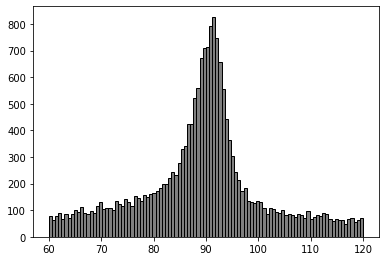

In [5]:
fig = plt.figure()
z = fig.add_axes([0.1,0.1,0.8,0.8])
z.hist(zr['invariant_mass'], bins = 100, color=('gray'), ec='black')
#z.grid()

# Problem 3)

The Relativistic Breit-Wigner distribution is expected to describe the , which is given as

Wikepedia: https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

$f(E) = \frac{k}{(E^2 -M^2)^2 + M^2\Gamma^2}$, where

 * $\gamma$ = $\sqrt{M^2(M^2+\Gamma^2)}$
 * $k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}$
 
 Where $E$ is the energy, $M$ is the mass value where the function will peak. 
 Fit the invariant mass distribution with the function:
 
 $aE + b + cf(E)$,
 
 where $a, b, $ and $c$ are fit parameters to be deterimined by your fit that describe a linear background, and $f(E)$ is the Relativistic Breit-Wigner function described above. To do this you should make a function that takes as agruments: $\Gamma, M, a, b, c$. Where $\Gamma$ and $M$ are contained in the Breit-Wigner function ($f(E)$). Our fit will determine the values $\Gamma, M, a, b, c$. The value of $M = m_{inv}$ and should be near where the distribution peaks.   
 
**Fit the distribution over the range $70 \le M_Z \le 110 \;GeV/c^2 $ and calculate the reduced $\chi^2$. You can use either the *curve_fit* function form Scipy.**

**Q:** How does your invariant mass value compare to the accepted value ($M_Z = 91.1876 GeV/c^2$) of the $Z$ boson mass (you can look it up on Wikipedia)?
 
**Q:** Calculate the reduced $\chi^2$ and p-value of your fit. 

You plot for this problem should look like:


In [7]:
def bw(Γ, M, a, b, c):
  gamma = np.sqrt((M**2)*((M**2) + Γ**2))

  knum = 2 * np.sqrt(2) * M * Γ * γ
  kden = np.pi * np.sqrt((M**2) + γ)
  k = knum/kden

  den = (E**2 - M**2)**2 + ((M**2)*(Γ**2))
  fE = k/den

  final = (a * E) + b + (c * fE)
  return final


# fig = plt.figure()
# plt.hist(bw())

fit = 110-70

op.curve_fit(bw(zr['invariant_mass']), E, M, p0=fit )



TypeError: ignored

In [10]:
# fig = plt.figure()
# fit = fig.add_axes([0.1,0.1,0.8,0.8])
# fit.hist()
# fit.set_title('Breit-Wigner distribution')

# Problem 4)

On the same graph, make histograms of the $\eta_1$ and $\eta_2$ distributions. Be sure to include a legend so the two distributions can be distinquised.

Your plot should look like:
<div>
<img src="attachment:P4.png" width="400"/>
</div>

In [14]:
#Find eta1 and eta2 distributions

# eta1_dist = 
# eta2_dist = 


In [15]:

# et = plt.figure()
# et = et.add_axes([0.1,0.1,0.8,0.8])
# et.set_title('Eta Distributions')
# et.hist(eta2_dist, bins=100, alpha= 0.5, label='Eta 1')
# et.hist(eta1_dist, bins=100, alpha= 0.5, label='Eta 2')
# et.legend()

# Problem 5)

From the distribution above, we clearly see two distinct distributions in the histogram. We can explain this due to the decay being detected in two different detectors, the electromagnetic barrel calorimeter (EB) and the endcap electromagnetic calorimeter (EE). This distinction is made in the column labeled *type1* and *type2*, which tells us which detector particle 1 and particle 2 are detected in. 

Create two DataFrames *barrel* and *endcap*, where *barrel* keeps all of the information in the original DataFrame where both particles were detected in the EB, and *endcap* keeps all of the information in the original DataFrame where both particles were detected in the EE.

Make two sub plots where in sub plot one you histogram the $\eta1$ distribution for the particles in the EB and EE. Then in sub plot two histogram the $\eta2$ distribution for particles detected in the EE and EB. Be sure to include a legend that distiquishes EB from EE events.

Your plot should look like this:


In [11]:
barrel = zr.copy(deep=True)
endcap = zr.copy(deep=True)
#barrel.insert(1, 'invariant_mass', m_inv, allow_duplicates=False)
#endcap.insert(1, 'invariant_mass', m_inv, allow_duplicates=False)

br = barrel[barrel['type1'] == 'EB'] 
br = br[br['type2'] == 'EB']

ec = endcap[endcap['type1'] == 'EE']
ec = ec[ec['type2']== 'EE']
#print(ec)


# Problem 6

With particles being detected in two different detectors, the resolution of the detectors could differ. This could reslt in measureing the boson mass better in one detector than the other.

Using your *barrel* and *endcap* DataFrames from above, on the same graph make a histogram of the invariant mass measured in the barrel and endcap detectors.  

Your plot should look like this:
<div>
<img src="attachment:P6.png" width="400"/>
</div>

**Q**: Which region (Barrel or Endcap) gives the better measurement? 


 Around the 90 value gives the better measurement, especially in Barrel


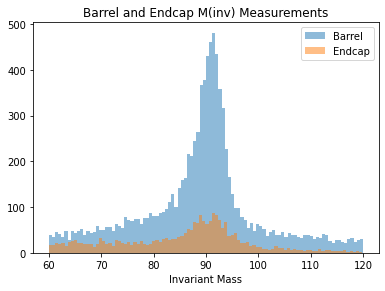

In [ ]:

be = plt.figure()
be = be.add_axes([0.1,0.1,0.8,0.8])
be.set_title('Barrel and Endcap M(inv) Measurements')
be.hist(br['invariant_mass'],bins=100, alpha= 0.5, label=r'Barrel')
be.hist(ec['invariant_mass'], bins=100, alpha= 0.5, label=r'Endcap')
be.set_xlabel('Invariant Mass')
be.legend()



print('\n Around the 90 value gives the better measurement, especially in Barrel')

# Problem 7

Seeing that the $Z$ mass distribution is different depending on if it was measured in the endcap or barrel detectors and that there is a gap (inefficency) in the pseudorapidity near $|\eta| = 1.5$, let's fit the barrel and endcap regions seperatly. 

Add a new columns to our DataFrame called M_barrel and M_endcap, where 
* M_barrel is an array that takes all values of invariant mass column defined in Problem 2 whose $\eta$ values satisfy $|\eta_1| < 1.1$ **and** $|\eta_2| < 1.1$  
* M_endcap is an array that takes all values of invariant mass column defined in Problem 2 whose $\eta$ values satisfy $|\eta_1| > 1.7$ **and** $|\eta_2| > 1.7$

This is sometimes reffered to as cutting on a quantity, in this case $\eta_1$ and $\eta_2$.

Plot the histograms of both of these quantities on the same graph. It should look like this:


Text(0.5, 1.0, 'M_barrel and M_endcap Measurements')

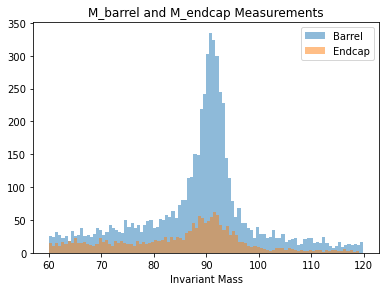

In [ ]:
mbarrel = barrel.copy(deep=True)
mbarrel['eta1'] = np.absolute(mbarrel['eta1'])
mbarrel['eta2'] = np.absolute(mbarrel['eta2'])

mendcap = endcap.copy(deep=True)
mendcap['eta1'] = np.absolute(mendcap['eta1'])
mendcap['eta2'] = np.absolute(mendcap['eta2'])

m_barrel = []
m_endcap = []


mbarrel1 = mbarrel[mbarrel['eta1'] < 1.1]
mbarrel2 = mbarrel1[mbarrel1['eta2'] < 1.1]

mendcap1 = mendcap[mendcap['eta1'] > 1.7]
mendcap2 = mendcap1[mendcap1['eta2'] > 1.7]
#print(mendcap2)


# zr.insert(2, 'm_barrel', mbarrel2['invariant_mass'], allow_duplicates=False)
# zr.insert(3, 'm_endcap', mendcap2['invariant_mass'], allow_duplicates=False)

b = plt.figure()
b = b.add_axes([0.1,0.1,0.8,0.8])
b.hist(zr['m_barrel'], bins =100, alpha= 0.5, label=r'Barrel')
b.hist(zr['m_endcap'], bins=100, alpha= 0.5, label=r'Endcap')
b.set_xlabel('Invariant Mass')
b.legend()
b.set_title('M_barrel and M_endcap Measurements')

# Problem 8

Fit the M_barrel histogram with the relativistic Breit-Wigner function you defined earlier and calculate the reduced $\chi^2$ and p-value for the fit. Draw a plot of the M_barrel histogram with your fit result (e.g. like in Problem 3).

**Q**: Does your fit provide better or worst description of the data compared to what you found in Problem 3?

In [12]:
# b = op.curve_fit(bw(zr['m_barrel']), E, p0= fit)

# mb = plt.figure()
# mb = mb.add_axes([0.1,0.1,0.8,0.8])
# mb.hist(zr['m_barrel'], bins =100, alpha= 0.5)
# mb.set_title('M_barrel Histogram')

# print('\n ')

# Problem 9

Fit the M_endcap histogram with the relativistic Breit-Wigner function you defined earlier and calculate the reduced $\chi^2$ and p-value for the fit. Draw a plot of the M_endcap histogram with your fit result (e.g. like in Problem 3).

**Q**: Does your fit provide better or worst description of the data compared to what you found in Problem 3?

In [13]:
# e = op.curve_fit(bw(zr['m_barrel']), E, p0= fit)

# me = plt.figure()
# me = me.add_axes([0.1,0.1,0.8,0.8])
# me.hist(zr['m_endcap'], bins =100)
# me.set_title('M_barrel Histogram')

# print('\n ')

# Problem 10

From your DataFrame (from Problem 2), drop all columns except for pt1, eta1, phi1, pt2, eta2, phi2, and M. 
Using this DataFrame, use the Pandas *corr* function to produce a correlataion table. What quantites have the strongest correlation (that are not 1)?


 The strongest correlation seems to be in the top left


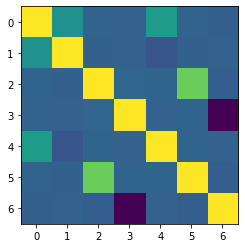

In [ ]:
df = zr.copy(deep=True)

df.drop(['Run', 'isoTrack1', 'isoEcal1', 'isoHcal1', 'sigmaEtaEta2', 'HoverE2', 'isoTrack2', 'isoEcal2', 'isoHcal2', 'm_barrel', 'm_endcap', 'Event', 'Q1', 'type1', 'type2', 'sigmaEtaEta1', 'HoverE1', 'Q2'],axis=1,inplace=True)

#df

fig = plt.figure()
plt.imshow(df.corr())

print('\n The strongest correlation seems to be in the top left')